

# Project: Investigate medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I checked the data and there was no null values, but I discovered that the age colums has invalid values. I wanted to know whether there is a relation between age, gender, diabetes, and alcoholism and the not showing to the medical appointments in Brazil. 

In [20]:
# import libraries for wrangling, cleaning and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

There are patients whose age is zero or less which is irrelavant, so I removed any rows containing age less than or equal zero.

### General Properties

In [21]:
# read the csv file and show its header
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#show the shape of the data
df.shape

(110527, 14)

In [23]:
# describe the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [25]:
#from the df there are some age outliers shown
df[df['Age'] < 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [26]:
df[df['Age']>100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No



### Data Cleaning 
I dropped some unnecessary columns like patient id and appointment id. I aslo removed the age which is less than or equal zero.

In [27]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#drop both patient and appointment ids as they have no effect on data
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace= True)

In [28]:
false_age = df[ df['Age']< 1].index
df.drop(false_age, inplace= True )


In [29]:
df[df['Age']< 1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [30]:
#get rid of age greater than hundred because it may affect the data as it is considered as outliers
big_age = df[df['Age']> 100].index
df.drop(big_age, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

> 

### Research Question 1 (Are females more likely to show up at their medical appointments?)

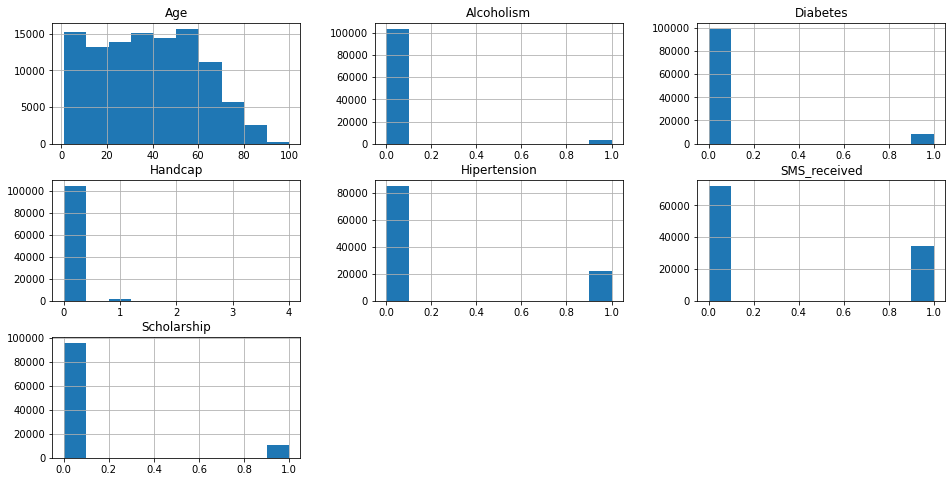

In [31]:
# a histogram to take a general look over the data
df.hist(figsize= (16,8));

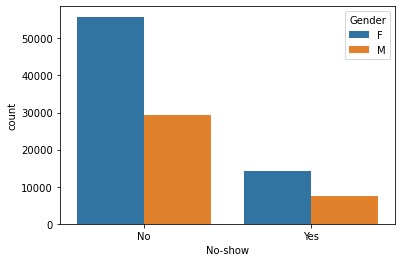

In [32]:
#count plot to show the numbers of both males and females showing up to their appointments.
sns.countplot(x='No-show',hue='Gender',data=df)

This plot shows that the number of females showing  to their appointments in clincis is more than males. But it also shows the the total number of females having appointments in clinic is also higher.

<a id='eda'></a>
## Does Alcoholism play a role in missing appointments?






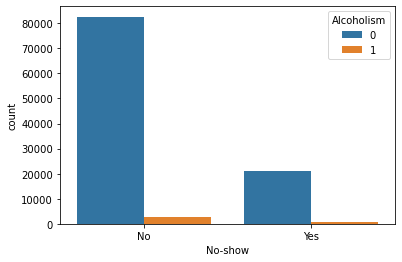

In [33]:
#count plot to show the relation between alcoholism and missing the medical appointments.
sns.countplot(x= 'No-show', hue ='Alcoholism', data =df)



This count plot shows that alcoholism affect the showing up to the clinical appointments. The alcoholics tend to miss their appointments.

### Research Question 3  (Is age matter?)

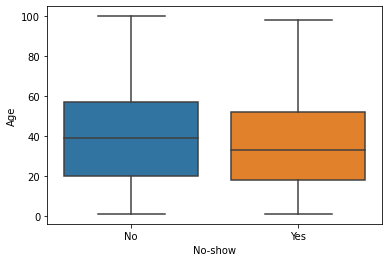

In [34]:
# boxplot to show the effect of age on showing to the medical appointments.
sns.boxplot(data=df, x='No-show', y='Age')

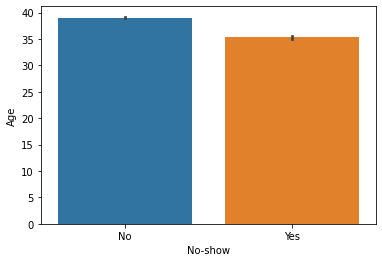

In [35]:
# Also a barplot to confirm the effect of age.
sns.barplot(x='No-show',y="Age",data=df)

Apparently, the older the person, the more likely he/she will not miss his/her medical appointment.

 ## Does having diabetes affect the showing up for the medical appointments?

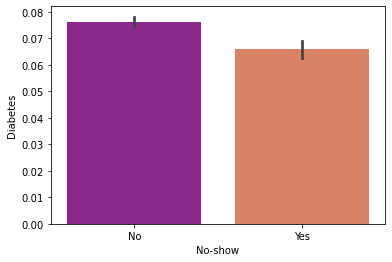

In [36]:
#bar plot to show whether diabetes affect the attendance in clinics in Mexico.
sns.barplot(x ='No-show', y ='Diabetes', data = df, palette ='plasma')
 

 This shows that diabetics tend to show to their appointments in clinics more than non diabetics.

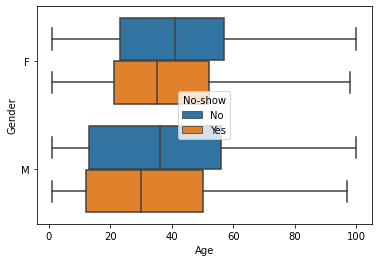

In [38]:
#boxplot to show the correlation between gender and age with attendance in clincics.
sns.boxplot(data=df, x='Age', y='Gender', hue ='No-show');


It seems like older females are more likely to not miss their appointments more than younger females. And the same applies also for men.

<a id='conclusions'></a>
## Conclusions
First, there is a relation between age and showing up to the medical appointments, as the older people are more likely to show up. Second, there is also arelation between diabetes, as diabetec patients tend to show up more. Third, alcoholism has a strong relation as alcoholic persons are less likely to attend their appointments. Finally, there is no relation betwween gender and showing up for the medical appointments.



## Limitation
there was some limitation in the data as the age is irrelavent and there is outliers, so I removed the raws that contained the age below or equal zero and the age above hundred